In [1]:
import numpy as np
import sympy as sym
from tqdm import tqdm
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def funcion(x):
    f_x=(x**3)/(np.exp(x)-1)
    return f_x

In [3]:
def PolinomioLaguerre(n):
    x = sym.Symbol('x', Real=True)
    y = sym.Symbol('y', Real=True)
    
    y = sym.exp(-x)*x**n
    pol_n = sym.exp(x)*sym.diff(y, x, n)/(np.math.factorial(n))

    polinomio_func = sym.lambdify([x], pol_n, 'numpy')
    return polinomio_func, pol_n

In [4]:
def NewtonRapson(f, df, xn, itmax=10000, precision = 1e-8):
    error = 1
    it = 0
    while error>precision and it<itmax:
        try:
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))
        except ZeroDivisionError:
            print('División por cero')
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

In [22]:
def obtenerRaices(n, decimales,puntos=int(5e3)):
    x = sym.Symbol('x', Real=True)
    x_prueba = np.linspace(0, 1000,puntos)
    raices = np.array([])
    polinomio,pol_n = PolinomioLaguerre(n)
    dpol = sym.diff(pol_n, x, 1)
    dpol = sym.lambdify([x], dpol, 'numpy')
    for i in x_prueba:
        raiz = NewtonRapson(polinomio, dpol, i)
        raiz_r = np.round(raiz, decimales)
        if raiz_r not in raices:
            raices = np.append(raices, raiz_r)
    raices.sort()
    return raices

In [23]:
def pesoLaguerre(n, raiz,pol_next):
    peso=raiz/((n+1)**2*(pol_next(raiz))**2)
    return peso

In [24]:
def cuadraturaGaussLaguerre(f,n, decimales=9):
    raices = obtenerRaices(n, decimales)
    pesos=np.array([])
    valores=np.array([])
    for raiz in raices:
        peso = pesoLaguerre(n, raiz, PolinomioLaguerre(n+1)[0])
        pesos=np.append(pesos,peso)
        f_x = f(raiz)
        valores=np.append(valores,f_x)

    integral = np.sum(pesos*valores)
    
    integral_aprox=round(integral, decimales)

    return integral_aprox

In [25]:
def errorGaussLaguerre(n, decimales=9):
    errors = np.array([])
    for value in tqdm(n):
        errors = np.append(errors, cuadraturaGaussLaguerre(funcion,value,decimales)/(np.pi**4/15))
    return errors

In [26]:
rta_a=cuadraturaGaussLaguerre(funcion,3)
print(f"Punto a: Integral calculada por cuadratura de Gauss-Laguerre con n = 3 y 9 cifras decimales de aproximación es {rta_a}")

Punto a: Integral calculada por cuadratura de Gauss-Laguerre con n = 3 y 9 cifras decimales de aproximación es 0.481130172


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:16<00:00,  1.88s/it]


Text(0.5, 1.0, 'Precisión Cuadratura de Gauss Laguerre calculada')

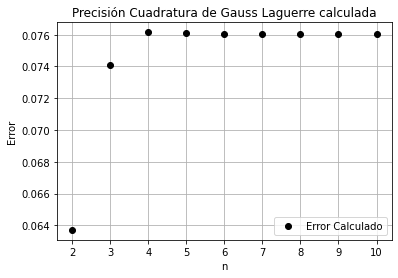

In [27]:
n = np.linspace(2, 10, 9, dtype=int)
rta_b=errorGaussLaguerre(n)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(n, rta_b, label= "Error Calculado", color='black')
ax.legend()
ax.set_ylabel("Error")
ax.set_xlabel("n")
ax.grid()
ax.set_axisbelow(True)
plt.title("Precisión Cuadratura de Gauss Laguerre calculada")